In [42]:
#importing libraries
import pandas as pd
import numpy as np
import pymysql
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
db_name = "project"
db_host = "localhost"
db_username = "root"
db_password = "Nature2376*"

try:
    conn = pymysql.connect(host = db_host,
                           port = int(3306),
                           user = "root",
                           password = db_password,
                           db = db_name)
except e:
    print (e)
if conn:
    print ("connection successful")
else:
        print ("error")

connection successful


In [43]:
#reading and displaying the database
df4 = pd.read_sql_query("select * from AREA", conn)
df4.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13564\937441875.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql_query("select * from AREA", conn)


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5,120,4.0
2,Uttarahalli,3 BHK,1440,2,62,3.0
3,Electronic City Phase II,2 BHK,1056,2,39.07,2.0
4,Chikka Tirupathi,4 Bedroom,2600,5,120,4.0


## 1.Feature Engineering

In [44]:
df5['price'] = pd.to_numeric(df5['price'], errors='coerce')
df5['total_sqft'] = pd.to_numeric(df5['total_sqft'], errors='coerce')

df5 = df5.dropna(subset=['price', 'total_sqft'])

df5['price_per_sqft'] = df5['price'] * 100000 / df5['total_sqft']

In [45]:

df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3.0,4305.555556
3,Electronic City Phase II,2 BHK,1056.0,2,39.07,2.0,3699.810606
4,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4.0,4615.384615


In [46]:
df5.to_csv("bhp.csv",index=False)

In [47]:
# Examine locations which is a categorical variable. 
# We need to apply dimensionality reduction technique here to reduce number of locations
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

location
other                     2736
Whitefield                 487
Sarjapur  Road             358
Electronic City            282
Kanakpura Road             241
                          ... 
Chikkabanavar               11
Nehru Nagar                 11
Gollarapalya Hosahalli      11
Jalahalli East              11
Nagadevanahalli             11
Name: count, Length: 234, dtype: int64

In [48]:
location_stats.values.sum()

12200

In [49]:
len(location_stats[location_stats>10])

234

In [50]:
len(location_stats)

234

In [51]:
len(location_stats[location_stats<=10])

0

In [52]:
#Any location having less than 10 data points should be tagged as "other" location.
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10 


Series([], Name: count, dtype: int64)

In [53]:
len(df5.location.unique())

234

In [54]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

234

In [55]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3.0,4305.555556
3,Electronic City Phase II,2 BHK,1056.0,2,39.07,2.0,3699.810606
4,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4.0,4615.384615
5,Uttarahalli,3 BHK,1440.0,2,62.00,3.0,4305.555556
6,Electronic City Phase II,2 BHK,1056.0,2,39.07,2.0,3699.810606
7,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4.0,4615.384615
8,Uttarahalli,3 BHK,1440.0,2,62.00,3.0,4305.555556
9,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3.0,6245.890861


## 2.Outliner Removal

In [56]:
# Normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. 
# If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier.
# so we remove these outliners

df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
15,other,6 Bedroom,1020.0,6,370.0,6.0,36274.509804
51,HSR Layout,8 Bedroom,600.0,9,200.0,8.0,33333.333333
64,Murugeshpalya,6 Bedroom,1407.0,4,150.0,6.0,10660.980810
74,Devarachikkanahalli,8 Bedroom,1350.0,7,85.0,8.0,6296.296296
76,other,3 Bedroom,500.0,3,100.0,3.0,20000.000000


In [57]:
df5.shape

(12200, 7)

In [58]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(11497, 7)

In [59]:
#using standard deviation and mean method for outliner removal
df6.price_per_sqft.describe()

count     11497.000000
mean       6329.225137
std        4237.022633
min         267.829813
25%        4210.526316
50%        5303.030303
75%        6943.005181
max      176470.588235
Name: price_per_sqft, dtype: float64

In [60]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(9495, 7)

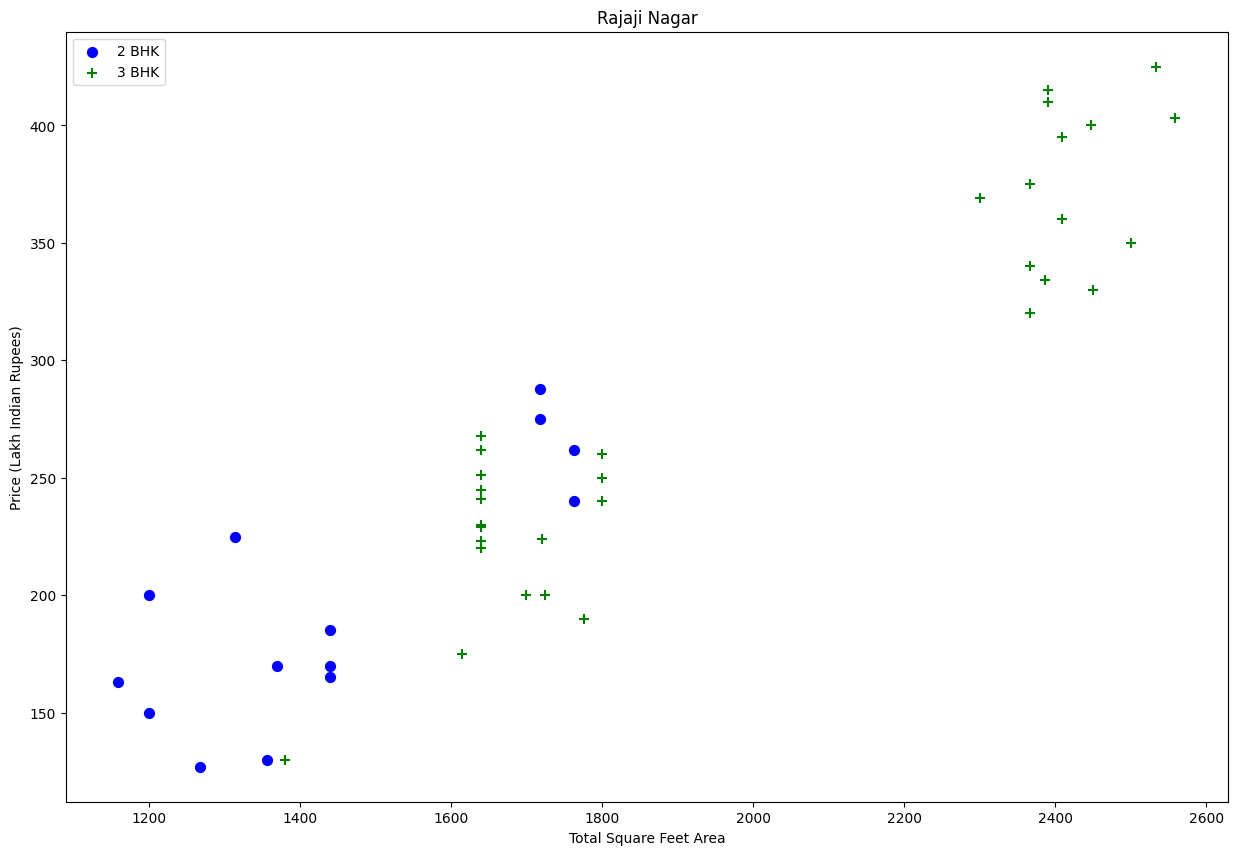

In [61]:
# using scatter graph to observe the prices of 2 and 3 bhks
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

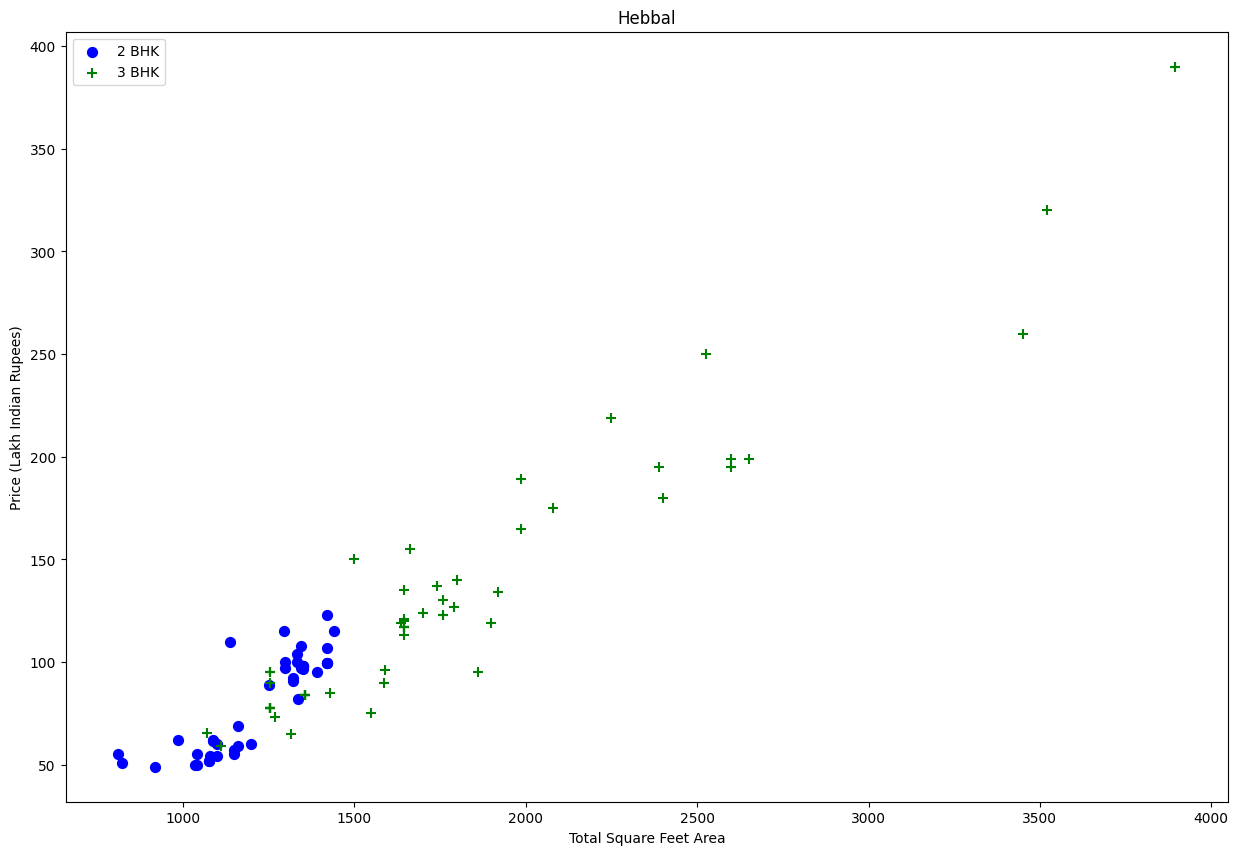

In [62]:
plot_scatter_chart(df7,"Hebbal")

In [63]:
# remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(6779, 7)

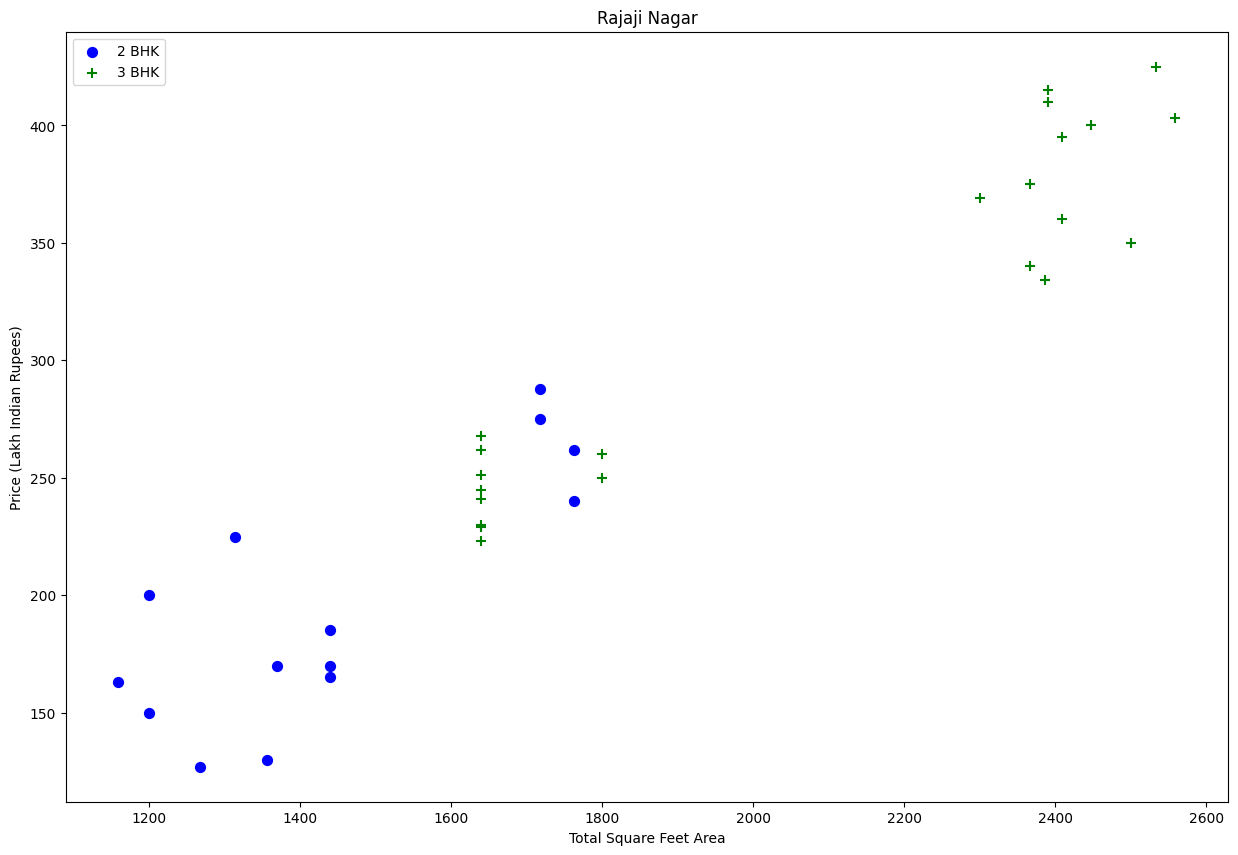

In [64]:
plot_scatter_chart(df8,"Rajaji Nagar")

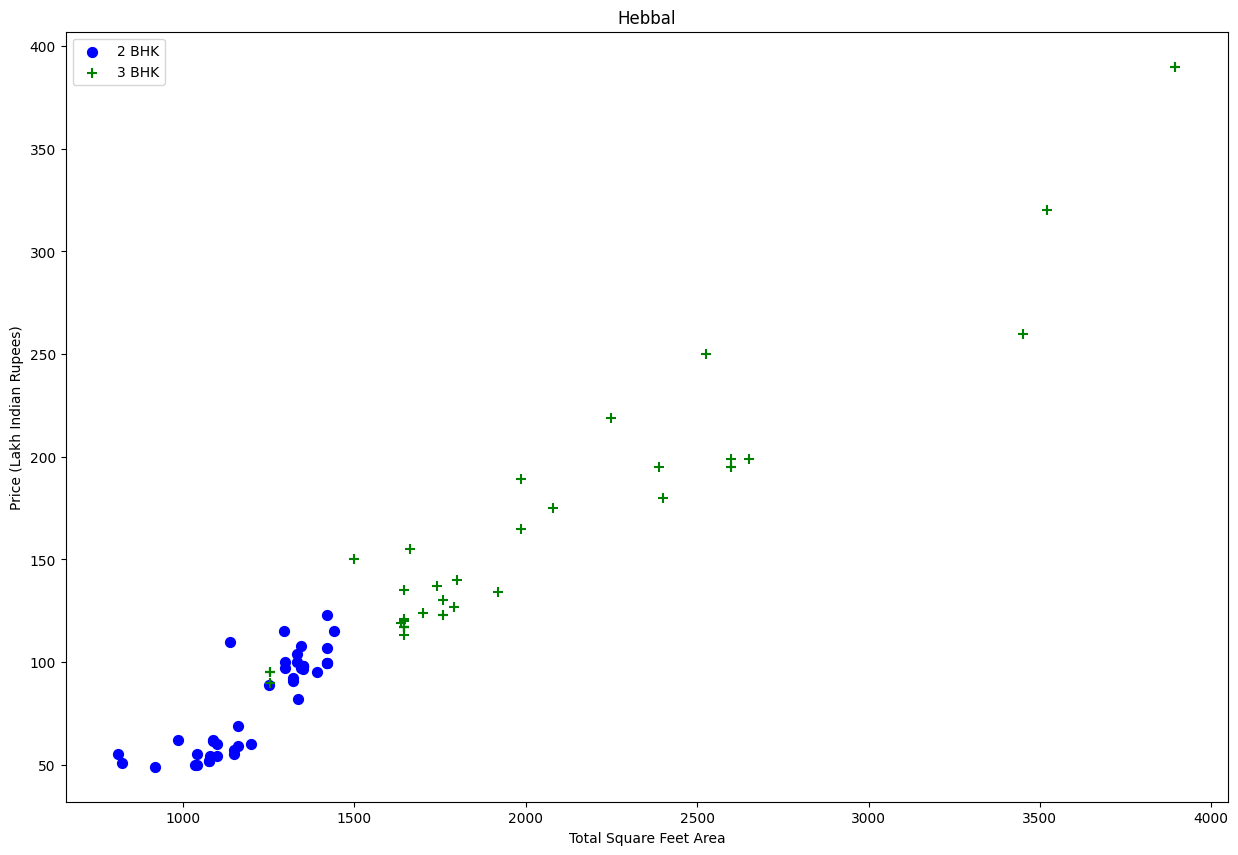

In [65]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

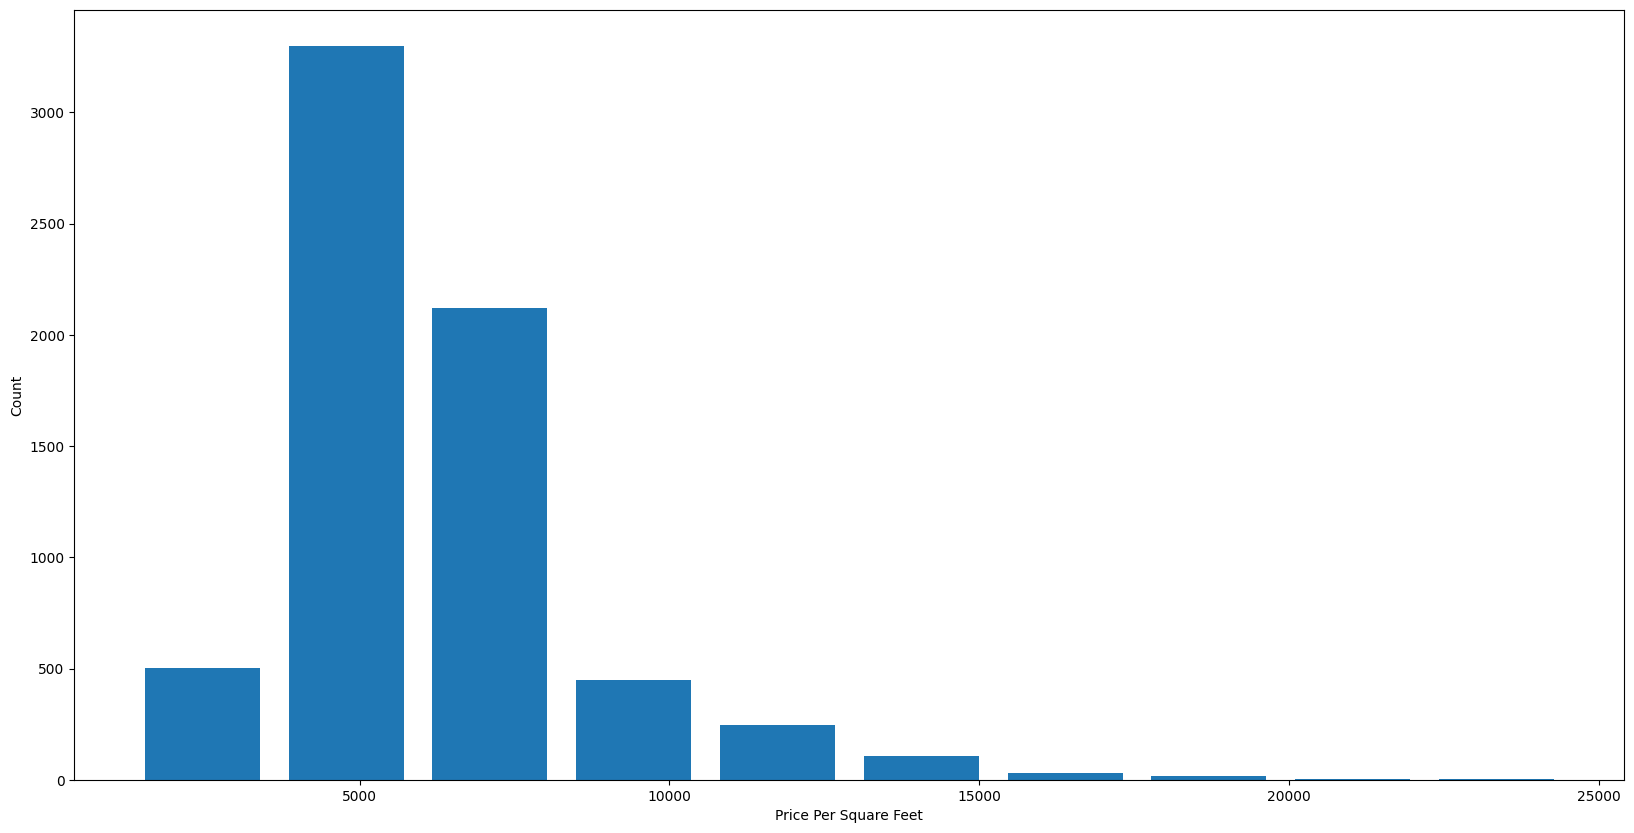

In [66]:
#using histogram to check the prices
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [67]:
df8.bath.unique()

array(['4', '3', '2', '5', '8', '1', '6', '7', '9', '', '12', '16', '13'],
      dtype=object)

Text(0, 0.5, 'Count')

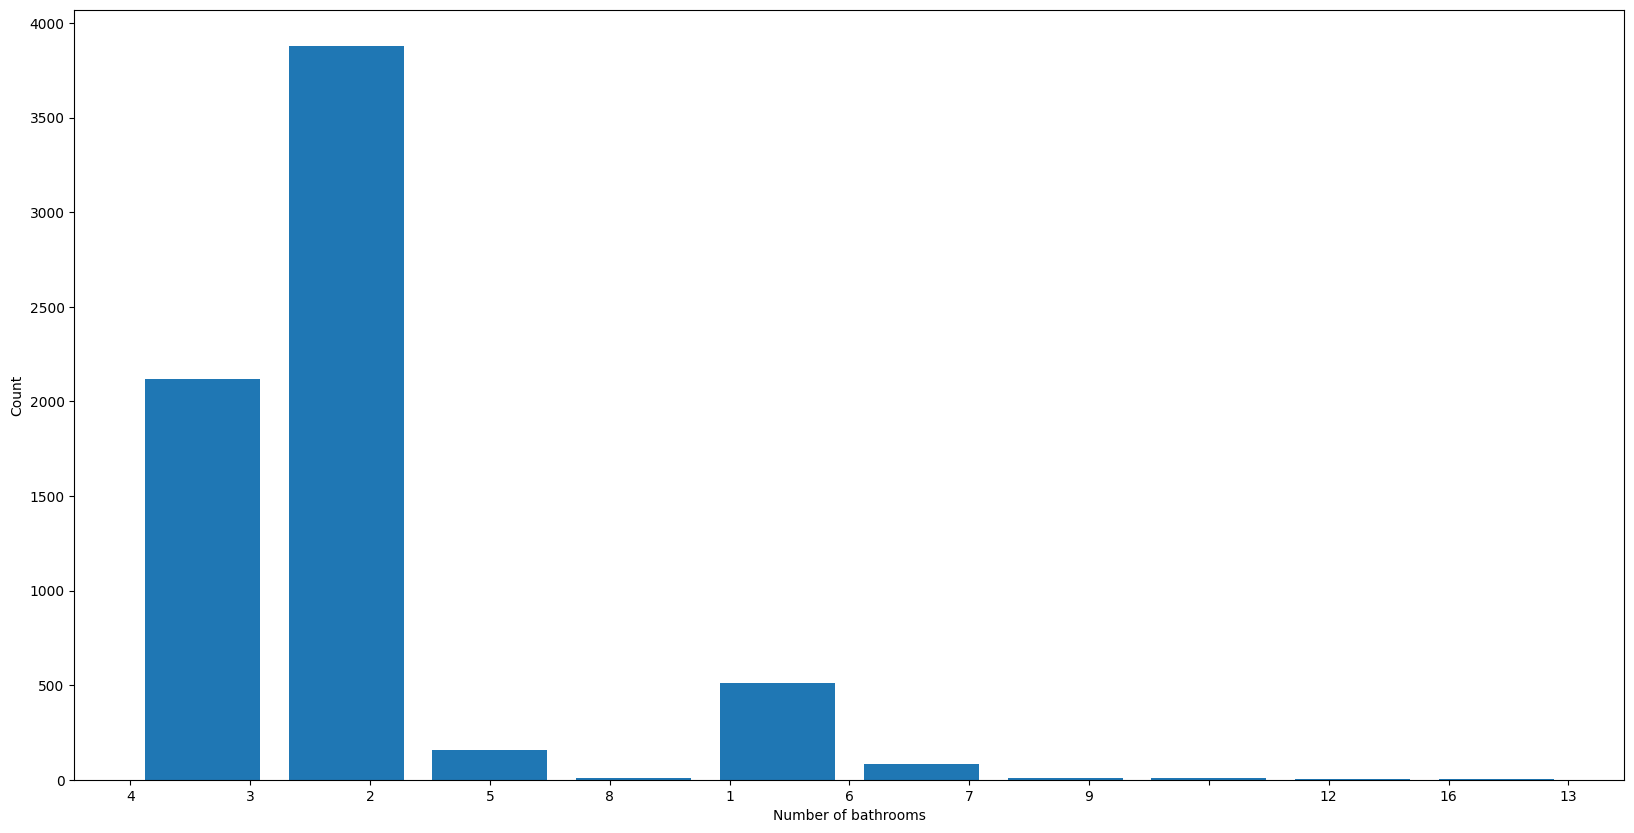

In [68]:
#removing bath where number of bath is greater than bhk
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [69]:
df8['bath'] = pd.to_numeric(df8['bath'], errors='coerce')

df8 = df8.dropna(subset=['bath'])

result_df = df8[df8['bath'] > 10]



In [70]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1490,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4.0,3252.032520
7783,other,6 BHK,11338.0,9.0,1000.0,6.0,8819.897689


In [71]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(6706, 7)

In [72]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3.0,11901.840491


In [73]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0


In [74]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [76]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 3. Building a model

In [77]:
df12.shape

(6706, 237)

In [78]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [79]:
X.shape

(6706, 236)

In [80]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [81]:
len(y)

6706

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [83]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7698981312319944

In [84]:
#Use K Fold cross validation to measure accuracy of our LinearRegression model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.77492701, 0.83787748, 0.77858085, 0.86187156, 0.87188572])

In [85]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", l

,model,best_score,best_params
0,linear_regression,0.825124,{'fit_intercept': False}
1,lasso,0.711318,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.700805,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [86]:
# Based on above results we can say that LinearRegression gives the best score.
# Hence we will use that.
# Test the model for few properties
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [87]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.15726624215984

In [88]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94.21047286839139

In [89]:
predict_price('Indira Nagar',1000, 2, 2)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


178.342264427386

In [90]:
predict_price('Indira Nagar',1000, 3, 3)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


182.3954710536176

In [91]:
# Export the tested model to a pickle file
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [92]:
# Export location and column information to a file that will be useful later on in our prediction application
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))